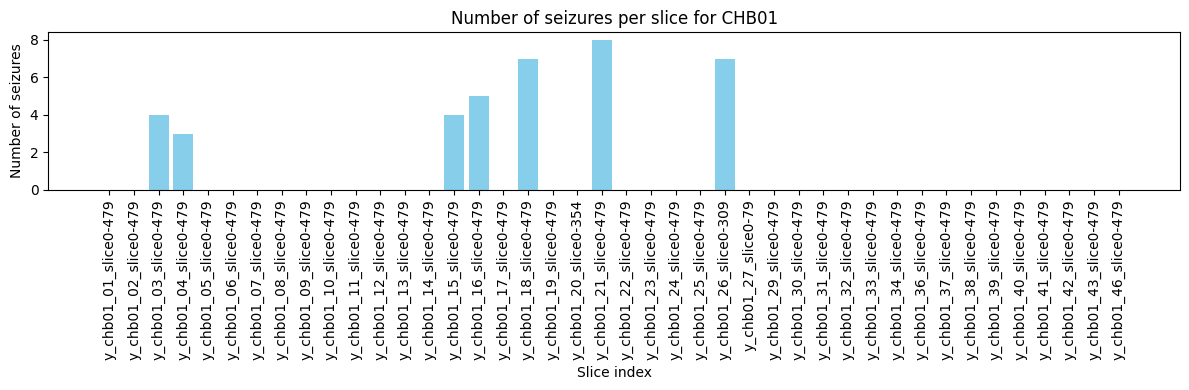

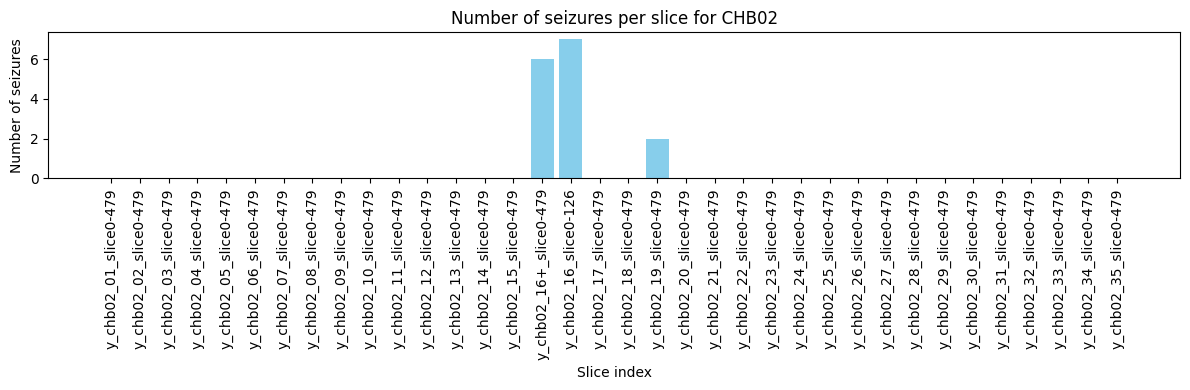

In [ ]:
# --- Visualize seizure counts per slice for all subjects ---
import os
import numpy as np
import matplotlib.pyplot as plt

subjects = [f"chb{str(i).zfill(2)}" for i in range(1, 13)]
base_dir = "../data/processed"

for subject in subjects:
    subject_dir = os.path.join(base_dir, subject)  # <-- folder path, not file path
    
    x_files = sorted([f for f in os.listdir(subject_dir) if f.startswith("X_")])
    y_files = sorted([f for f in os.listdir(subject_dir) if f.startswith("y_")])
    
    seizure_counts = []
    for yf in y_files:
        y_slice = np.load(os.path.join(subject_dir, yf))
        seizure_counts.append(np.sum(y_slice))
    
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(y_files)), seizure_counts, color='skyblue')
    plt.title(f"Number of seizures per slice for {subject.upper()}")
    plt.xlabel("Slice index")
    plt.ylabel("Number of seizures")
    plt.xticks(range(len(y_files)), [yf.split(".")[0] for yf in y_files], rotation=90)
    plt.tight_layout()
    plt.show()